<a href="https://colab.research.google.com/github/jodavelo/artificial-intelligence/blob/main/Copia_de_UnSupervised_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importa la librería para montar Google Drive en Colab
from google.colab import drive
# Monta Google Drive en la ruta especificada
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importa las librerías necesarias para manejo de datos y visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importa las herramientas de preprocesamiento de scikit-learn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
# Carga los datos desde un archivo CSV en Google Drive, especificando la codificación y el delimitador
df = pd.read_csv('/content/gdrive/My Drive/Master/IA/Casual/segmentacion.csv', encoding='latin-1', delimiter=';')

## Data cleaning and preparation

In [ ]:
# Define las características categóricas y numéricas presentes en el dataset
categorical_features = ['estado_terminal', 'producto_red', 'tecnologiapp', 'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter', 'grupo_version', 'mcc', 'grupo_version_ant', 'ciudadfin']
numerical_features = ['trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres', 'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres', 'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos', 'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3', 'cantidad_falla_m2', 'cantidad_falla_mes1']

In [ ]:
# Crea un transformador de columnas que estandariza las características numéricas y convierte las categóricas a one-hot encoding
#
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [ ]:
# Crea un pipeline de preprocesamiento que incluye el transformador de columnas
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
# Imprime la lista de columnas del DataFrame
print(df.columns.tolist())

['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp', 'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter', 'grupo_version', 'fecha_version', 'mcc', 'segmento_actual', 'grupo_version_ant', 'ciudadfin', 'seccionalfin', 'fecha_creacion_terminal', 'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres', 'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres', 'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos', 'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3', 'cantidad_falla_m2', 'cantidad_falla_mes1', 'fecha_compra', 'inicio_actividades_pos', 'fecha_Full']


In [ ]:
# Muestra las primeras filas del DataFrame
df.head()

,mcodes,terminal,estado_terminal,producto_red,tecnologiapp,modelopp,tecnologiaaf,modeloaf,browser,nombretipoter,...,prom_mes_tres,prom_mes_dos,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1,fecha_compra,inicio_actividades_pos,fecha_Full
0,348443760,1806A6M9U356211,Activo,h,a,p,b,j,o,f,...,0,0,"38,51612903",1,0,0,0,2018-10-30 00:00:00.000,6/12/2018,31/12/2018
1,348646977,1375A6MM7263427,Activo,q,c,c,d,h,p,p,...,0,0,"0,225806452",1,0,0,0,2018-03-27 00:00:00.000,10/12/2018,31/12/2018
2,212187780,125741149382240,Activo,m,a,p,b,j,o,k,...,0,0,0,4,0,0,1,2013-04-02 00:00:00.000,19/09/2018,31/12/2018
3,214878384,1104S0148347454,Activo,t,b,t,c,l,o,i,...,"0,266666667","3,133333333","4,612903226",6,0,5,12,2012-09-27 00:00:00.000,22/05/2018,31/12/2018
4,214371423,125849396128146,Activo,h,a,p,a,j,o,f,...,"4,366666667","4,033333333","9,677419355",1,0,0,0,2012-06-14 00:00:00.000,9/08/2018,31/12/2018


In [ ]:
# Imprime nuevamente la lista de columnas del DataFrame (posiblemente para verificar cambios)
print(df.columns.tolist())

['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp', 'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter', 'grupo_version', 'fecha_version', 'mcc', 'segmento_actual', 'grupo_version_ant', 'ciudadfin', 'seccionalfin', 'fecha_creacion_terminal', 'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres', 'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres', 'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos', 'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3', 'cantidad_falla_m2', 'cantidad_falla_mes1', 'fecha_compra', 'inicio_actividades_pos', 'fecha_Full']


Fix the last one column name

In [ ]:
# Reemplaza secuencias de comas en los nombres de columnas por cadenas vacías
df.columns = [col.replace(',,,,', '') for col in df.columns]
print(df.columns.tolist())


['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp', 'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter', 'grupo_version', 'fecha_version', 'mcc', 'segmento_actual', 'grupo_version_ant', 'ciudadfin', 'seccionalfin', 'fecha_creacion_terminal', 'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres', 'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres', 'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos', 'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3', 'cantidad_falla_m2', 'cantidad_falla_mes1', 'fecha_compra', 'inicio_actividades_pos', 'fecha_Full']


Data convert ---> (strings to floats)

In [ ]:
# Convierte las características numéricas de formato texto a float, reemplazando comas por puntos
for col in numerical_features:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

In [ ]:
# Aplica el pipeline de preprocesamiento al DataFrame y obtiene el dataset transformado
df_transformed = pipeline.fit_transform(df)

In [ ]:
# Lista de características numéricas transformadas (en este caso, es igual a las originales)
transformed_numerical_features = numerical_features

In [ ]:
# transformed_categorical_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

In [ ]:
# Inicializa la lista de columnas transformadas solo con las características numéricas
transformed_columns = list(transformed_numerical_features)

In [ ]:
# Imprime la forma del DataFrame transformado
print(df_transformed.shape)

(99999, 1191)


In [ ]:
# Combina las características numéricas y categóricas transformadas para obtener los nombres de todas las columnas transformadas
transformed_columns = (numerical_features +
                       list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
# Verifica si el número de columnas transformadas coincide con el esperado y se crea un DataFrame con los datos transformados
if df_transformed.shape[1] == len(transformed_columns):
    df_transformed_df = pd.DataFrame(df_transformed.toarray(), columns=transformed_columns)
else:
    print(f"Error: Mismatch in number of transformed columns ({df_transformed.shape[1]}) and provided column names ({len(transformed_columns)})")

In [ ]:
# Imprime el DataFrame transformado (esta línea no funcionará correctamente como está escrita)
df_transformed

<99999x1191 sparse matrix of type '<class 'numpy.float64'>'
	with 2899971 stored elements in Compressed Sparse Row format>

## K- Means - clustering

In [ ]:
# Importa KMeans para clustering y PCA para reducción de dimensionalidad
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#asigna el DataFrame o array transformado, resultante del preprocesamiento aplicado mediante el pipeline
X = df_transformed

NameError: name 'df_transformed' is not defined

### Apply K means

In [ ]:
# Configura y entrena el modelo KMeans con un número especificado de clusters y una semilla aleatoria
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Obtiene las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans.labels_

In [ ]:
# Crea una copia del DataFrame original para no modificarlo
df_original = df.copy()

In [ ]:
# Asigna las etiquetas de cluster al DataFrame copiado
df_original['Cluster'] = labels

To determinate the optime number for K means clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


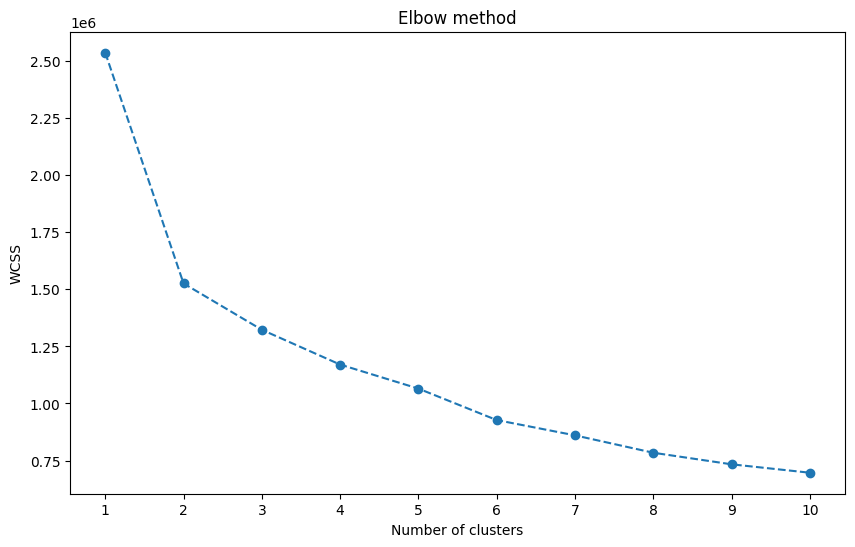

In [ ]:
# Calcula y grafica el método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

## Apply K-Means with a specific number of clusters

In [ ]:
# Inicializa el modelo KMeans con 5 clusters y una semilla aleatoria para reproducibilidad
kmeans = KMeans(n_clusters=5, random_state=42)
# Ajusta el modelo KMeans al conjunto de datos transformado
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Obtiene las etiquetas de los clusters asignadas a cada muestra en el conjunto de datos
labels = kmeans.labels_

In [ ]:
# Asigna las etiquetas de clusters obtenidas con K-Means a una nueva columna en el DataFrame original
df_original['Cluster'] = labels

### Cluster Analysis

In [ ]:
# Cuenta la cantidad de muestras en cada cluster y las imprime para obtener una idea de la distribución de los clusters
cluster_counts = df_original['Cluster'].value_counts()
print(cluster_counts)

0    38064
1    37593
3    22893
4     1447
2        2
Name: Cluster, dtype: int64


In [ ]:
# Calcula las estadísticas promedio para cada cluster y las imprime, lo cual ayuda a entender las características promedio de cada cluster
cluster_stats = df_original.groupby('Cluster').mean()
print(cluster_stats)

               mcodes  trx_dia_cero   trx_dia_uno   trx_dia_dos  \
Cluster                                                           
0        3.133705e+08     13.092055     11.675047     14.726907   
1        2.623466e+08     15.936318      9.524539     19.469156   
2        3.024393e+08  55872.000000  79945.500000  77395.500000   
3        3.202989e+08     10.350675     11.377539     13.656402   
4        2.685306e+08    100.169316    103.791292    119.612301   

          trx_dia_tres  trx_dia_cuatro  trx_dia_cinco  trx_dia_seis  \
Cluster                                                               
0            13.397541       11.462721      11.341346      3.529083   
1            23.964169       22.106616      21.786849      4.103024   
2        111849.000000    81810.000000   78297.000000  79233.000000   
3            12.954659       11.106015      10.240729      5.092910   
4           119.778162      112.793366     112.343469     77.315826   

         trx_mes_tres   trx_mes_

<ipython-input-63-0366d4a71a6b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = df_original.groupby('Cluster').mean()


### K Means visualization

In [ ]:
# Inicializa PCA para reducir la dimensionalidad a 2 componentes principales, facilitando la visualización de los clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Aplica PCA a los datos transformados y los reduce a dos dimensiones
reduced_data = pca.fit_transform(X.toarray())

# Crea un DataFrame con los datos reducidos y agrega las etiquetas de clusters correspondientes
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = labels

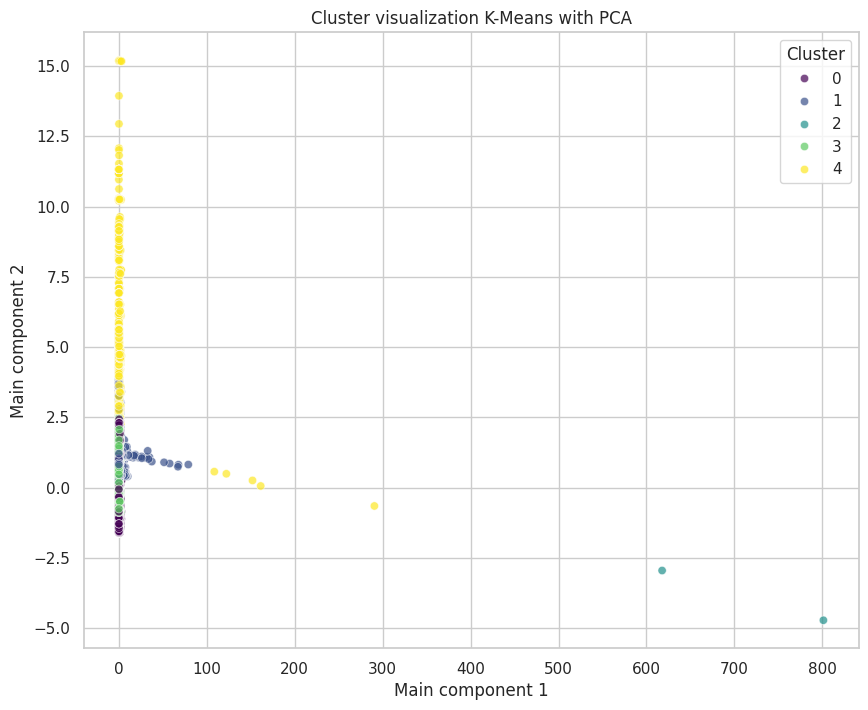

In [ ]:
# Configura el estilo de los gráficos con seaborn y prepara un gráfico de dispersión de los componentes principales
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=reduced_df, palette='viridis', alpha=0.7)

# Añade un título y etiquetas para los ejes al gráfico, proporcionando contexto sobre la visualización
plt.title('Cluster visualization K-Means with PCA')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')

# Muestra el gráfico, lo cual permite visualizar cómo se distribuyen los clusters en un espacio de dos dimensiones
plt.show()

## Clusters evaluation

In [ ]:
# Calcula el coeficiente de silueta promedio para los clusters, que es una medida de cuán similar es una muestra a su propio cluster en comparación con otros clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
# Imprime el coeficiente de silueta promedio, proporcionando una idea de la calidad de la agrupación realizada
print(f"El coeficiente de silueta promedio para los clusters es: {silhouette_avg}")

El coeficiente de silueta promedio para los clusters es: 0.24525423630769355
